In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris() 

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns')
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


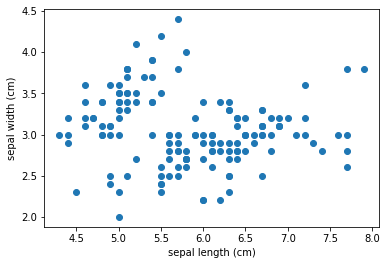

In [10]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

In [12]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)

In [13]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.024426573426574,
 21.049430775603195,
 17.410248787976723,
 14.842075016346058,
 12.943532952759496,
 11.137127338304975,
 9.56417893217894]

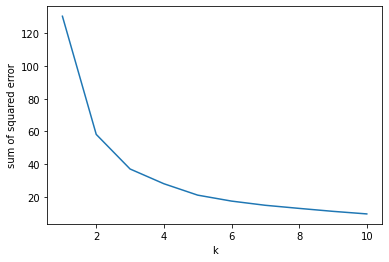

In [14]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range, sse)

In [17]:
km1 = KMeans(n_clusters=2)
km2 = KMeans(n_clusters=3)
km3 = KMeans(n_clusters=5)

In [18]:
df['Cluster1'] = km1.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])

In [19]:
df['Cluster2'] = km2.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])

In [20]:
df['Cluster3'] = km3.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])

In [21]:
df

,sepal length (cm),sepal width (cm),Cluster1,Cluster2,Cluster3
0,5.1,3.5,1,0,0
1,4.9,3.0,1,0,4
2,4.7,3.2,1,0,4
3,4.6,3.1,1,0,4
4,5.0,3.6,1,0,0
...,...,...,...,...,...
145,6.7,3.0,0,1,1
146,6.3,2.5,0,2,2
147,6.5,3.0,0,1,1
148,6.2,3.4,0,1,1


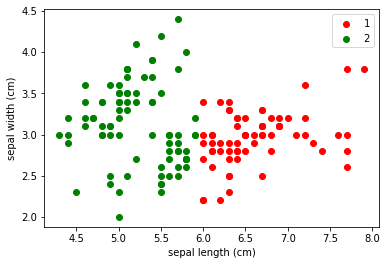

In [22]:
df1 = df[df['Cluster1'] == 0]
df2 = df[df['Cluster1'] == 1]

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', label = '1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', label = '2')
plt.legend()

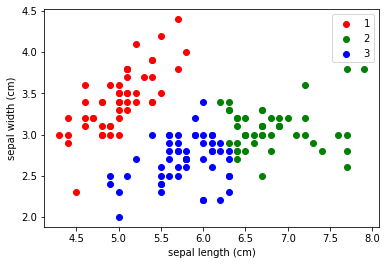

In [23]:
df1 = df[df['Cluster2'] == 0]
df2 = df[df['Cluster2'] == 1]
df3 = df[df['Cluster2'] == 2]

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', label = '1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', label = '2')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color = 'blue', label = '3')
plt.legend()

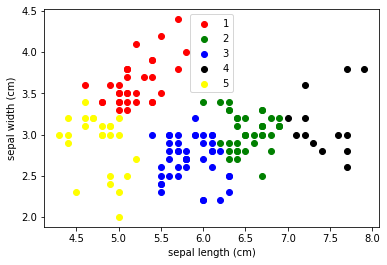

In [24]:
df1 = df[df['Cluster3'] == 0]
df2 = df[df['Cluster3'] == 1]
df3 = df[df['Cluster3'] == 2]
df4 = df[df['Cluster3'] == 3]
df5 = df[df['Cluster3'] == 4]

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', label = '1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'green', label = '2')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color = 'blue', label = '3')
plt.scatter(df4['sepal length (cm)'], df4['sepal width (cm)'], color = 'black', label = '4')
plt.scatter(df5['sepal length (cm)'], df5['sepal width (cm)'], color = 'yellow', label = '5')
plt.legend()